In [2]:
#Import of function to calculate comoving distances 
import sys 
sys.path.append("../../")
from pyACC.Cosmology import Integrand_comoving_distance
from pyACC.Cosmology import comoving_distance

import numpy as np
import math 
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("pyACC.CosmologicalDistances")

**Compute cosmological distances**

In this exercise, integration will be applied  in a cosmological context computing cosmological distances.

The basis to compute distances is the Hubble function $H(z)$, which describes the evolution of the backgroud.

For flat $\Lambda$ CDM cosmology it reads:
$$
D_c(z)=\int_0^z \frac{dz'c}{H\left(z'\right)}
$$

Implementing $H(z)$ in different cosmological models allows to define distances in the contenst that is being studied.

In [3]:
#Definition of the Hubble function and parameters needed
z         = 1
Omega_mat = 0.3
H_0       = 72

def Hubble_function(z, Omega_mat, H_0):
    return H_0*(Omega_mat*(1+z)**3+1-Omega_mat)**0.5

#Calling functions to performe the integral and obtain comoving distance
get_distances = comoving_distance(z, Hubble_function, Omega_mat, H_0)


In [4]:
# Comoving distance at z=1
print(get_distances, "Mpc")

2024-03-26 16:46:51.353716 :: pyACC.CosmologicalDistances  :: 3214.279443449222 Mpc


In [5]:
# array of 100 redshifts, with np.linspace(start, end, how many elements) 
z_list = np.linspace(0.0001, 2.5, 100) 
print('Check of z_list length: ', len(z_list))

#List of distances to be filled
d_list = []

# Calculate the comoving distance at each redshift in z_list
for i in range(len(z_list)):
    comoving_distances = comoving_distance(z_list[i], Hubble_function, Omega_mat, H_0)
    d_list.append(comoving_distances)
 
print('Check of d_list length: ', len(d_list))



2024-03-26 16:46:51.396212 :: pyACC.CosmologicalDistances  :: Check of z_list length:  100
2024-03-26 16:46:54.025857 :: pyACC.CosmologicalDistances  :: Check of d_list length:  100


From the non observable $D_c(z)$, it is possible to estimate different typologies of distances:
1. Angular diameter distance: $D_A(z)=\frac{D_c(z)}{1+z}$;
2. Luminosity distance: $D_L(z)=D_c(z)\cdot(1+z)$;

It is customary to introduce the "Distance modulus" $m$, definied as the difference between the apparent magnitude and the absolute magnitude of an object.
Trere are two important relations:
1. $m = 5\log_{10}\left(\frac{D_L(z)}{10pc}\right)$;
2. $m = 5\log_{10}\left(\frac{D_C(z)}{10pc}\right)+25$
where distances are expressed in pc and the constant $10 pc$ is chosen so that the distance modulus is on a logarithmic scale.

In [6]:
# Calculate the angular diameter distance at each redshift in z_list
D_A = []

for i in range(len(z_list)):
    angular_diameter_distance = d_list[i]/(1+z_list[i])
    D_A.append(angular_diameter_distance)

# Calculate the luminosity distance at each redshift in z_list
D_L = []

for i in range(len(z_list)):
    luminosity_distance = d_list[i]*(1+z_list[i])
    D_L.append(luminosity_distance)


# Calculate the distance modulus at each redshift in z_list
mag = []

for distance in D_L: #this code allows to have direct access to each element stored in the list
    distance_modulus = 5*math.log10(distance*1e5) #D_L is in Mpc 
    mag.append(distance_modulus)


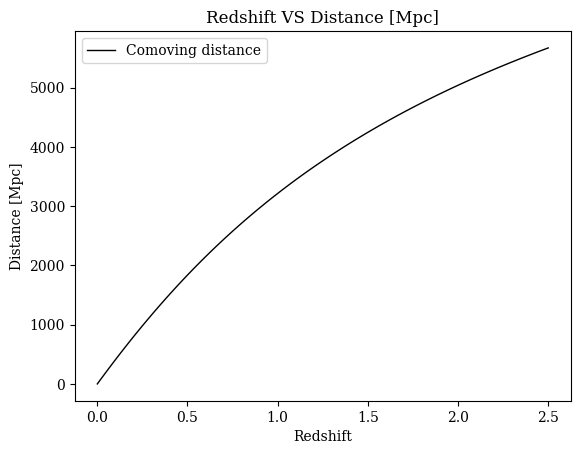

In [7]:
#Plotting Comoving Distances
plt.plot(z_list, d_list, lw=1, color="k", label="Comoving distance") #lw makes line thicker, scatter instead of plot not to have a line, but points
#WARNING!
#FUN FACT: first attempt, plot was givin few point on the same level! Of course: z is separated by 0.1 and 0.1 was the step of trapezoid, function used to integrate!
plt.title("Redshift VS Distance [Mpc]")
plt.legend()
plt.xlabel("Redshift")
plt.ylabel("Distance [Mpc]");

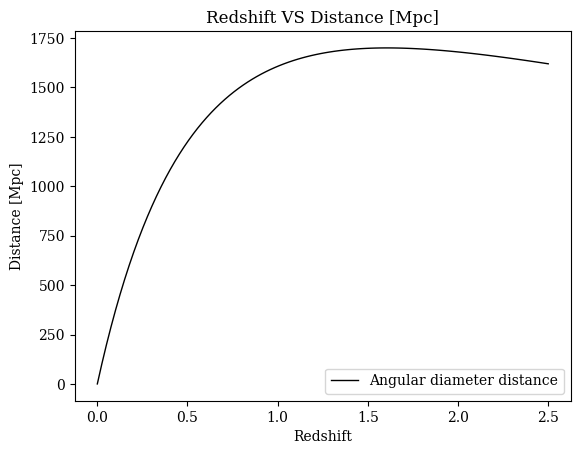

In [8]:
#Plotting angular diameter distances
plt.plot(z_list, D_A, lw=1, color="k", label="Angular diameter distance") 
plt.title("Redshift VS Distance [Mpc]")
plt.legend()
plt.xlabel("Redshift")
plt.ylabel("Distance [Mpc]");

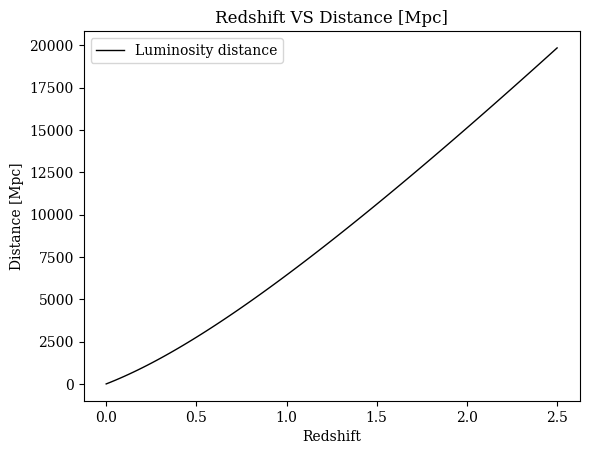

In [9]:
#Plotting Luminosity Distances
plt.plot(z_list, D_L, lw=1, color="k", label="Luminosity distance") 
plt.title("Redshift VS Distance [Mpc]")
plt.legend()
plt.xlabel("Redshift")
plt.ylabel("Distance [Mpc]");

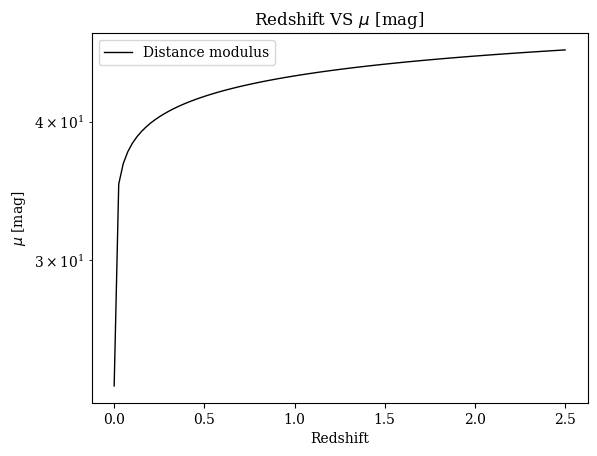

In [10]:
#Plotting distance modulus
plt.plot(z_list, mag, lw=1, color="k", label="Distance modulus")
plt.title("Redshift VS $\mu$ [mag]")
plt.legend()
plt.xlabel("Redshift")
plt.ylabel("$\mu$ [mag]");
plt.yscale('log')
